In [ ]:
#@title Load Dependencies
import numpy as np
from numpy import linalg as LA
from scipy import ndimage
from scipy import stats

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
!pip install ipython-autotime
%load_ext autotime
from scipy.optimize import curve_fit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 320 µs (started: 2022-08-13 19:37:14 +00:00)


In [ ]:
!pip install SciencePlots
!sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super
!sudo apt install fonts-noto-cjk
import matplotlib.pyplot as plt
plt.style.reload_library()
import matplotlib.font_manager as fm
fm._rebuild()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for SciencePlots: filename=SciencePlots-1.0.9-py3-none-any.whl size=6484 sha256=36d96f40e8cb886bd2671f7b329065c2c1c00e9225f051c805a133efb3a95a8c
  Stored in directory: /root/.cache/pip/wheels/37/f8/e9/b2f53a40b336388dfc57b108150daff7d6ffbbfc618dba3924
Successfully built SciencePlots
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  cm-super-minimal fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre ghostscript gsfonts javascript-common
  libcup

In [ ]:
plt.style.use('science')

plt.style.use(['science','grid'])
plt.rcParams["figure.figsize"] = (20,12)
plt.rcParams.update({'font.size': 28})

time: 4.14 ms (started: 2022-08-13 19:39:18 +00:00)


In [ ]:
Sm_Al_50eV_full = pd.read_csv(r'Sm Al 50eV full',sep='	',header=1)
Sm_Mg_50eV_full = pd.read_csv(r'Sm Mg 50eV full',sep='	',header=1)
Sm_Mg_30eV_FE = pd.read_csv(r'Sm Mg 30eV FE',sep='	',header=1)
Sm_Mg_30eV_3d = pd.read_csv(r'Sm Mg 30eV 3d',sep='	',header=1)
Sm_Mg_50eV_3d = pd.read_csv(r'Sm Mg 50eV 3d',sep='	',header=1)

Ag_Al_50eV_full = pd.read_csv(r'Silver Al 50eV-full',sep='	',header=1)
Ag_Mg_50eV_full = pd.read_csv(r'Silver Mg 50eV full',sep='	',header=1)
Ag_Al_30eV_3p = pd.read_csv(r'Silver Al 30eV 3p',sep='	',header=1)
Ag_Mg_30eV_3p = pd.read_csv(r'Silver Mg 30eV 3p',sep='	',header=1)
Ag_Al_30eV_3d = pd.read_csv(r'Silver Al 30eV 3p',sep='	',header=1)
Ag_Mg_30eV_3d = pd.read_csv(r'Silver Al 30eV 3d',sep='	',header=1)

DM_Al_50eV_full = pd.read_csv(r'DM Al 50mV full',sep='	',header=1)
silver_mg_survey_pp = pd.read_csv(r'Silver Mg 50eV full-pp.txt',sep='	',header=0)
silver_al_survey_pp = pd.read_csv(r'Silver Al 50eV-full-pp.txt',sep='	',header=0)
sm_mg_survey_pp = pd.read_csv(r'Sm Mg 50eV full-pp2.txt',sep='	',header=0)
dm_al_survey_pp = pd.read_csv(r'DM Al 50mV full - pp2.txt',sep='	',header=0)

time: 62.9 ms (started: 2022-08-13 19:39:18 +00:00)


In [ ]:
Mg=1253.6
Al=1486.6

time: 1.28 ms (started: 2022-08-13 19:39:18 +00:00)


In [ ]:
1486.6-1253.6

233.0

time: 7.43 ms (started: 2022-08-13 19:39:18 +00:00)


In [ ]:
#splitting constant Ag
47**4/(3**3*2*2.5*1)

36145.78518518519

time: 7.15 ms (started: 2022-08-13 19:39:18 +00:00)


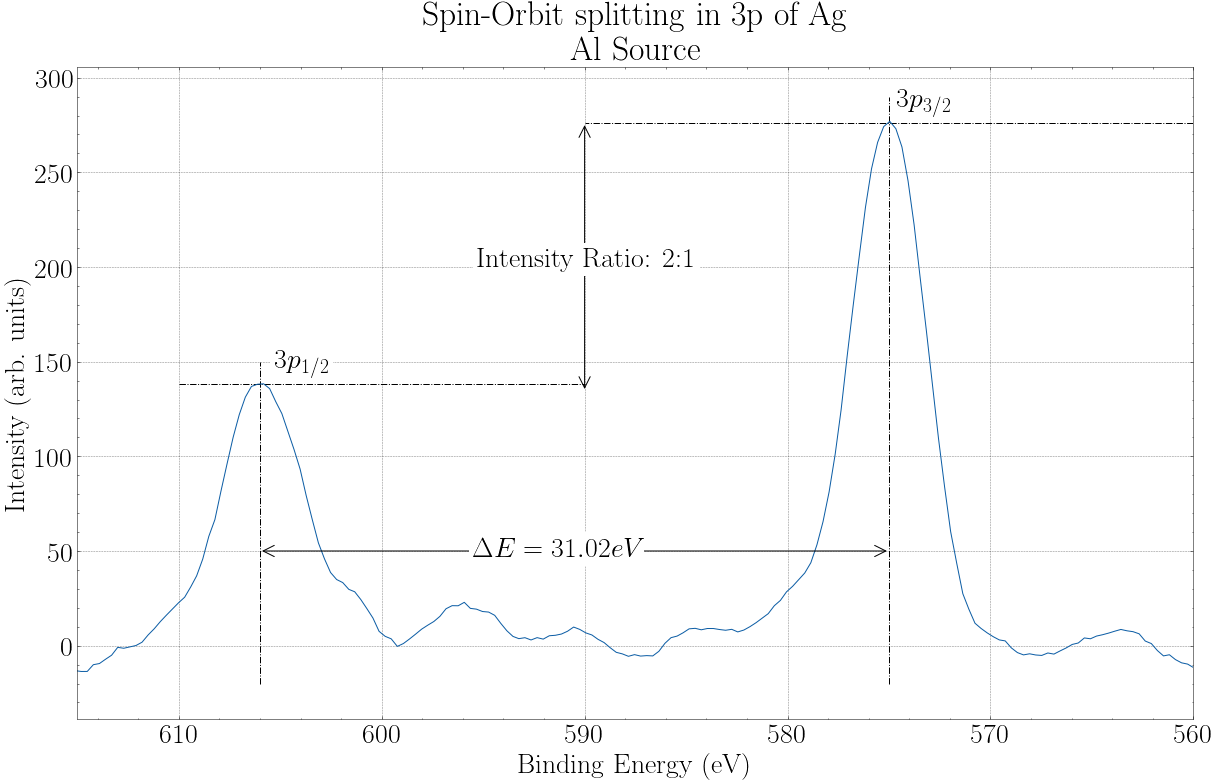

time: 3.48 s (started: 2022-08-13 19:39:18 +00:00)


In [ ]:
#Filter Data
from scipy.signal import savgol_filter
x=Ag_Al_30eV_3p["Energy(calc)"]
y=Ag_Al_30eV_3p["Sum"]/5
yf=savgol_filter(y, 31, 5)



#Background data
D_reg=Ag_Al_30eV_3p[((Ag_Al_30eV_3p["Energy(calc)"]>930) & (Ag_Al_30eV_3p["Energy(calc)"]<950))   |
                    ((Ag_Al_30eV_3p["Energy(calc)"]>895) & (Ag_Al_30eV_3p["Energy(calc)"]<910))   |
                    ((Ag_Al_30eV_3p["Energy(calc)"]>875) & (Ag_Al_30eV_3p["Energy(calc)"]<880))   ]

res = stats.linregress(D_reg["Energy(calc)"],D_reg["Sum"]/5)

#Substract Background
xr=np.linspace(min(x),max(x),y.shape[0])
ys=yf-res[0]*xr-res[1]

#Binding Energy
xb=Al-x+4.8
#Plot
sns.lineplot(x=xb,y=yf-res[0]*x-res[1])


#Annotate
plt.vlines(575,-20,290,linestyles="-.")
plt.vlines(606,-20,150,linestyles="-.")

plt.hlines(276,560,590,linestyles="-.")
plt.hlines(138,610,590,linestyles="-.")



plt.annotate("",
            xy=(590, 276), xycoords='data',
            xytext=(590, 134.5), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"),
            )

plt.annotate("",
            xy=(575, 50), xycoords='data',
            xytext=(606, 50), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"),
            )

plt.annotate(r'Intensity Ratio: 2:1 ', xy=(595.3, 200.5),  xycoords='data',backgroundcolor="w"
            )

plt.annotate(r'$\Delta E = 31.02 eV$', xy=(595.5, 47.5),  xycoords='data',backgroundcolor="w"
            )

plt.annotate(r'$3p_{1/2}$', xy=(605.3, 147),  xycoords='data',backgroundcolor="w",
            )

plt.annotate(r'$3p_{3/2}$', xy=(574.63, 285),  xycoords='data',backgroundcolor="w",
            )

#Invert X-axis & set Plot params
plt.xlim(615, 560)


plt.xlabel("Binding Energy (eV)")
plt.ylabel("Intensity (arb. units)")

plt.title("Spin-Orbit splitting in 3p of Ag \n Al Source")

plt.show()

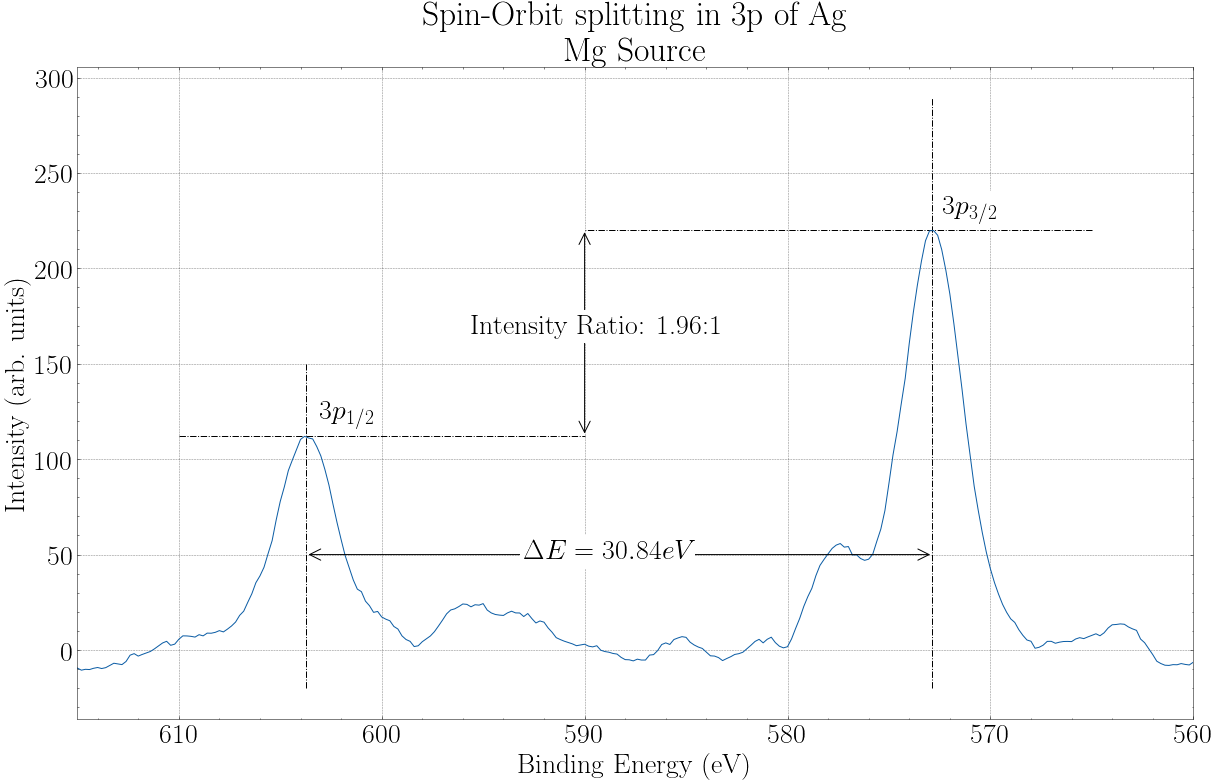

time: 1.86 s (started: 2022-08-13 19:39:21 +00:00)


In [ ]:
#Filter Data
from scipy.signal import savgol_filter
x=Ag_Mg_30eV_3p["Energy(calc)"]
y=Ag_Mg_30eV_3p["Sum"]/5
yf=savgol_filter(y, 31, 5)



#Background data
D_reg=Ag_Mg_30eV_3p[((Ag_Mg_30eV_3p["Energy(calc)"]>695) & (Ag_Mg_30eV_3p["Energy(calc)"]<710))   |
                    ((Ag_Mg_30eV_3p["Energy(calc)"]>660) & (Ag_Mg_30eV_3p["Energy(calc)"]<675))   |
                    ((Ag_Mg_30eV_3p["Energy(calc)"]>630) & (Ag_Mg_30eV_3p["Energy(calc)"]<650))   ]

res = stats.linregress(D_reg["Energy(calc)"],D_reg["Sum"]/5)

#Substract Background
xr=np.linspace(min(x),max(x),y.shape[0])
ys=yf-res[0]*xr-res[1]

#Binding Energy
xb=Mg-x+4.8
#Plot
sns.lineplot(x=xb,y=yf-res[0]*x-res[1])


#Annotate
plt.vlines(572.87,-20,290,linestyles="-.")
plt.vlines(603.71,-20,150,linestyles="-.")

plt.hlines(220,565,590,linestyles="-.")
plt.hlines(112.4,610,590,linestyles="-.")



plt.annotate("",
            xy=(590, 220), xycoords='data',
            xytext=(590, 112.4), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"),
            )

plt.annotate("",
            xy=(572.87, 50), xycoords='data',
            xytext=(603.71, 50), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"),
            )

plt.annotate(r'Intensity Ratio: 1.96:1 ', xy=(595.6, 166.2),  xycoords='data',backgroundcolor="w"
            )

plt.annotate(r'$\Delta E = 30.84 eV$', xy=(593.0, 48),  xycoords='data',backgroundcolor="w"
            )

plt.annotate(r'$3p_{1/2}$', xy=(603.1, 121.4),  xycoords='data',backgroundcolor="w",
            )

plt.annotate(r'$3p_{3/2}$', xy=(572.4, 229),  xycoords='data',backgroundcolor="w",
            )

#Invert X-axis & set Plot params
plt.xlim(615, 560)


plt.xlabel("Binding Energy (eV)")
plt.ylabel("Intensity (arb. units)")

plt.title("Spin-Orbit splitting in 3p of Ag \n Mg Source")

plt.show()

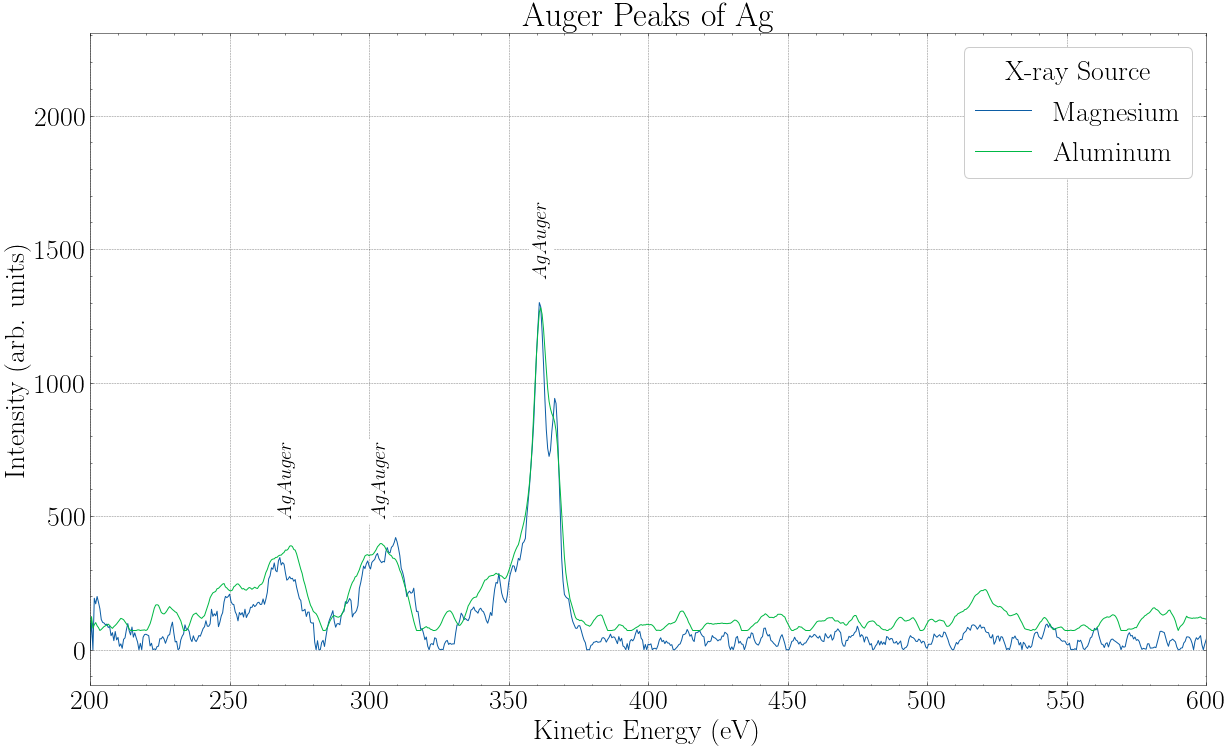

time: 2.23 s (started: 2022-08-13 19:39:23 +00:00)


In [ ]:
sns.lineplot(data=silver_mg_survey_pp,x="Energy(calc)",y="Scan1",label="Magnesium")
sns.lineplot(data=silver_al_survey_pp,x="Energy(calc)",y="Scan1",label="Aluminum")


plt.annotate(r'$Ag Auger$', xy=(358.45, 1400),  xycoords='data',backgroundcolor="w",
            rotation=90,size=20)
plt.annotate(r'$Ag Auger$', xy=(300.908, 500),  xycoords='data',backgroundcolor="w",
            rotation=90,size=20)
plt.annotate(r'$Ag Auger$', xy=(266.908, 500),  xycoords='data',backgroundcolor="w",
            rotation=90,size=20)


plt.xlim(200, 600)

plt.xlabel("Kinetic Energy (eV)")
plt.ylabel("Intensity (arb. units)")
plt.legend(title="X-ray Source")
plt.title("Auger Peaks of Ag")

plt.show()

In [ ]:
Mg

1253.6

time: 4.65 ms (started: 2022-08-13 19:39:26 +00:00)


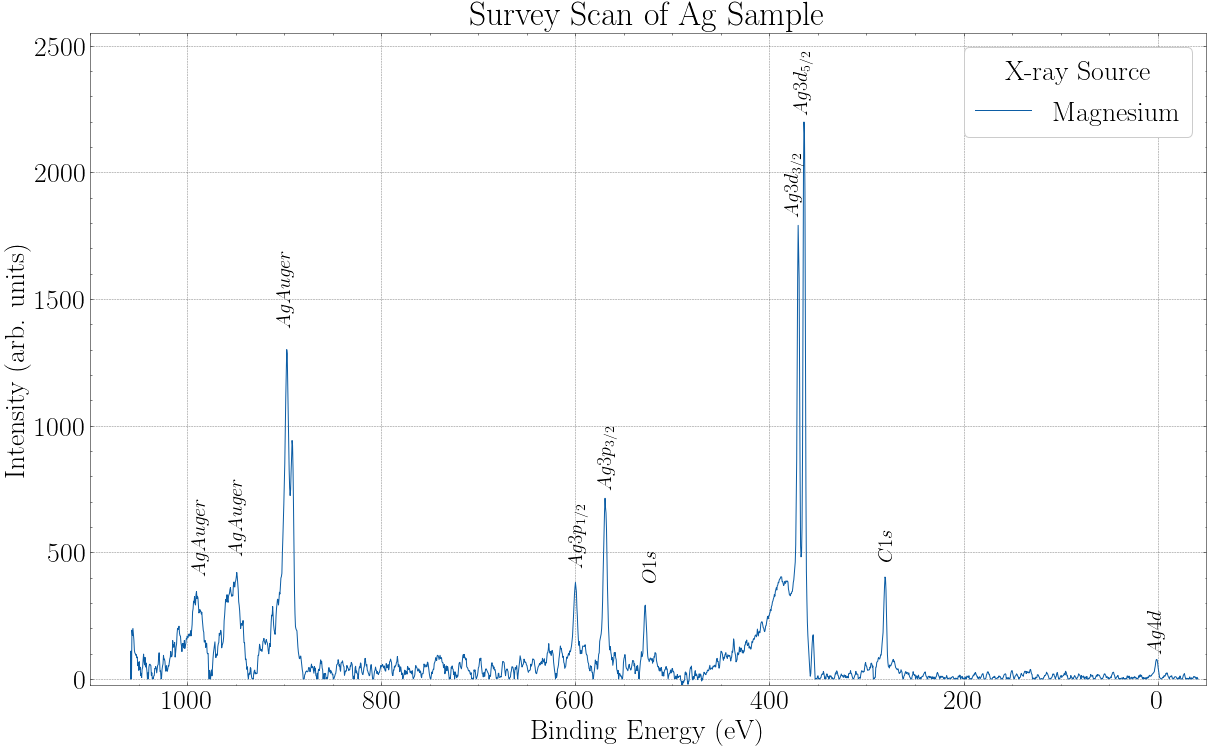

time: 1.67 s (started: 2022-08-13 19:39:26 +00:00)


In [ ]:
#sns.lineplot(data=silver_mg_survey_pp,x="Energy(calc)",y="Scan1",label="Magnesium")
x=silver_mg_survey_pp["Energy(calc)"]
y=silver_mg_survey_pp["Scan1"]
xc=Mg-x+4.8
sns.lineplot(x=xc,y=y,label="Magnesium")

plt.annotate(r'$Ag Auger$', xy=(4.8+Mg-350.45, 1400),  xycoords='data',
            rotation=90,size=20)
plt.annotate(r'$Ag Auger$', xy=(4.8+Mg-300.908, 500),  xycoords='data',
            rotation=90,size=20)
plt.annotate(r'$Ag Auger$', xy=(4.8+Mg-262.908, 420),  xycoords='data',
            rotation=90,size=20)


plt.annotate(r'$Ag 3p_{1/2}$', xy=(4.8+Mg-650, 465),  xycoords='data',
            rotation=90,size=20)
plt.annotate(r'$Ag 3p_{3/2}$', xy=(4.8+Mg-680, 770),  xycoords='data',
            rotation=90,size=20)

plt.annotate(r'$O 1s$', xy=(4.8+Mg-727, 390),  xycoords='data',
            rotation=90,size=20)

plt.annotate(r'$Ag 3d_{3/2}$', xy=(4.8+Mg-872, 1850),  xycoords='data',
            rotation=90,size=20)
plt.annotate(r'$Ag 3d_{5/2}$', xy=(4.8+Mg-882, 2250),  xycoords='data',
            rotation=90,size=20)

plt.annotate(r'$Ag 4d$', xy=(4.8+Mg-1247.5, 110),  xycoords='data',
            rotation=90,size=20)

plt.annotate(r'$C 1s$', xy=(4.8+Mg-970.5, 480),  xycoords='data',
            rotation=90,size=20)
plt.xlim(1100, -50)
plt.ylim(-25, 2550)



plt.xlabel("Binding Energy (eV)")
plt.ylabel("Intensity (arb. units)")
plt.legend(title="X-ray Source")
plt.title("Survey Scan of Ag Sample")

plt.show()

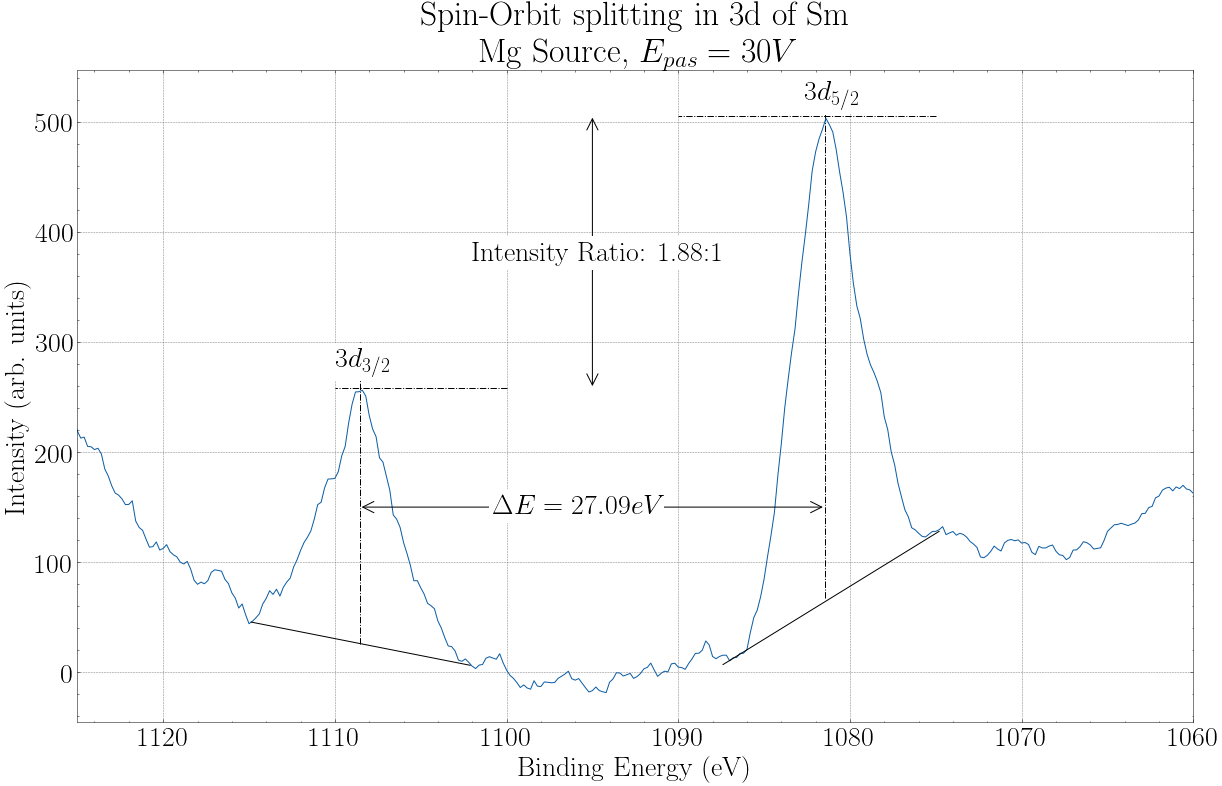

time: 4.75 s (started: 2022-08-13 19:39:27 +00:00)


In [ ]:
#Filter Data

x=Sm_Mg_30eV_3d["Energy(calc)"]
y=Sm_Mg_30eV_3d["Sum"]/5
yf=savgol_filter(y, 11, 3)



#Background data
D_reg=Sm_Mg_30eV_3d[(Sm_Mg_30eV_3d["Energy(calc)"]>155) & (Sm_Mg_30eV_3d["Energy(calc)"]<170)]

res = stats.linregress(D_reg["Energy(calc)"],D_reg["Sum"]/5)

#Substract Background

xr=np.linspace(min(x),max(x),y.shape[0])
ys=yf-res[0]*xr-res[1]

#Binding Energy
xb=Mg-x+4.8
#Plot
sns.lineplot(x=xb,y=yf-res[0]*x-res[1])

#Annotate



plt.vlines(1108.55,26,300,linestyles="-.")
plt.vlines(1081.46,67.5,520,linestyles="-.")

plt.hlines(258,1100,1110,linestyles="-.")
plt.hlines(505.4,1075,1090,linestyles="-.")

plt.annotate("",
            xy=(1102, 6), xycoords='data',
            xytext=(1115, 46), textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3"),
            )

plt.annotate("",
            xy=(1087.5, 6), xycoords='data',
            xytext=(1074.7, 129), textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3"),
            )


plt.annotate("",
            xy=(1095, 505.4), xycoords='data',
            xytext=(1095, 258), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"),
            )

plt.annotate("",
            xy=(1108.56, 150), xycoords='data',
            xytext=(1081.46, 150), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"),
            )

plt.annotate(r'Intensity Ratio: 1.88:1 ', xy=(1102, 375),  xycoords='data',backgroundcolor="w"
            )

plt.annotate(r'$\Delta E = 27.09 eV$', xy=(1100.8, 145),  xycoords='data',backgroundcolor="w"
            )

plt.annotate(r'$3d_{3/2}$', xy=(1110, 278),  xycoords='data',backgroundcolor="w",
            )

plt.annotate(r'$3d_{5/2}$', xy=(1082.7, 520),  xycoords='data',backgroundcolor="w",
            )

#Invert X-axis & set Plot params
plt.xlim(1125, 1060)


plt.xlabel("Binding Energy (eV)")
plt.ylabel("Intensity (arb. units)")

plt.title("Spin-Orbit splitting in 3d of Sm \n Mg Source, "+r"$E_{pas}=30V$")

plt.show()

In [ ]:
1108.55-1081.46

27.089999999999918

time: 13.3 ms (started: 2022-08-13 19:39:32 +00:00)


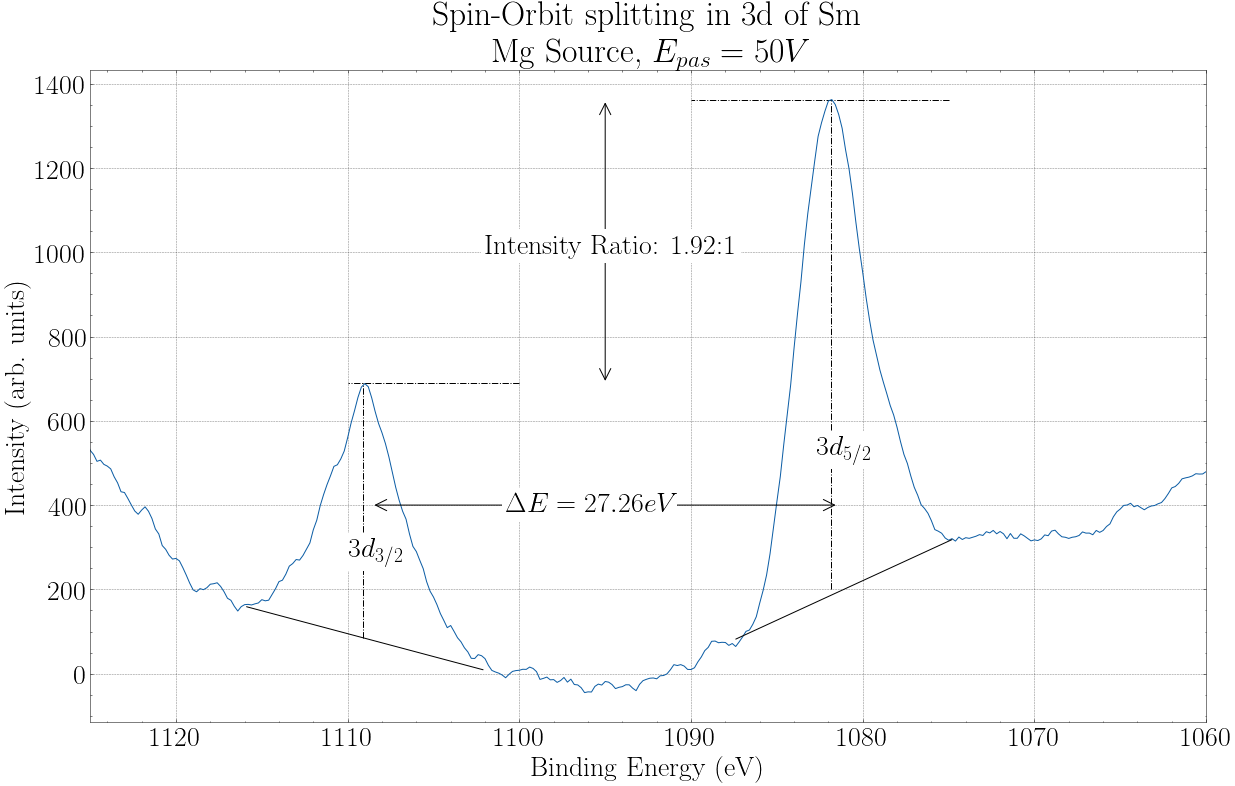

time: 2.88 s (started: 2022-08-13 19:39:32 +00:00)


In [ ]:
#Filter Data

x=Sm_Mg_50eV_3d["Energy(calc)"]
y=Sm_Mg_50eV_3d["Sum"]/5
yf=savgol_filter(y, 11, 3)



#Background data
D_reg=Sm_Mg_50eV_3d[(Sm_Mg_50eV_3d["Energy(calc)"]>155) & (Sm_Mg_50eV_3d["Energy(calc)"]<170)]

res = stats.linregress(D_reg["Energy(calc)"],D_reg["Sum"]/5)

#Substract Background

xr=np.linspace(min(x),max(x),y.shape[0])
ys=yf-res[0]*xr-res[1]

#Binding Energy
xb=Mg-x+4.8
#Plot
sns.lineplot(x=xb,y=yf-res[0]*x-res[1])

#Annotate



plt.vlines(1109.1,84,690,linestyles="-.")
plt.vlines(1081.84,200,1360,linestyles="-.")

plt.hlines(690,1100,1110,linestyles="-.")
plt.hlines(1360.4,1075,1090,linestyles="-.")

plt.annotate("",
            xy=(1102, 8), xycoords='data',
            xytext=(1116, 160), textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3"),
            )

plt.annotate("",
            xy=(1087.5, 80), xycoords='data',
            xytext=(1074.7, 320), textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3"),
            )


plt.annotate("",
            xy=(1095, 1360.4), xycoords='data',
            xytext=(1095, 690), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"),
            )

plt.annotate("",
            xy=(1108.56, 150+250), xycoords='data',
            xytext=(1081.46, 150+250), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"),
            )

plt.annotate(r'Intensity Ratio: 1.92:1 ', xy=(1102, 1000),  xycoords='data',backgroundcolor="w"
            )

plt.annotate(r'$\Delta E = 27.26 eV$', xy=(1100.8, 145+240),  xycoords='data',backgroundcolor="w"
            )

plt.annotate(r'$3d_{3/2}$', xy=(1110, 278),  xycoords='data',backgroundcolor="w",
            )

plt.annotate(r'$3d_{5/2}$', xy=(1082.7, 520),  xycoords='data',backgroundcolor="w",
            )

#Invert X-axis & set Plot params
plt.xlim(1125, 1060)


plt.xlabel("Binding Energy (eV)")
plt.ylabel("Intensity (arb. units)")

plt.title("Spin-Orbit splitting in 3d of Sm \n Mg Source, "+r"$E_{pas}=50V$")

plt.show()

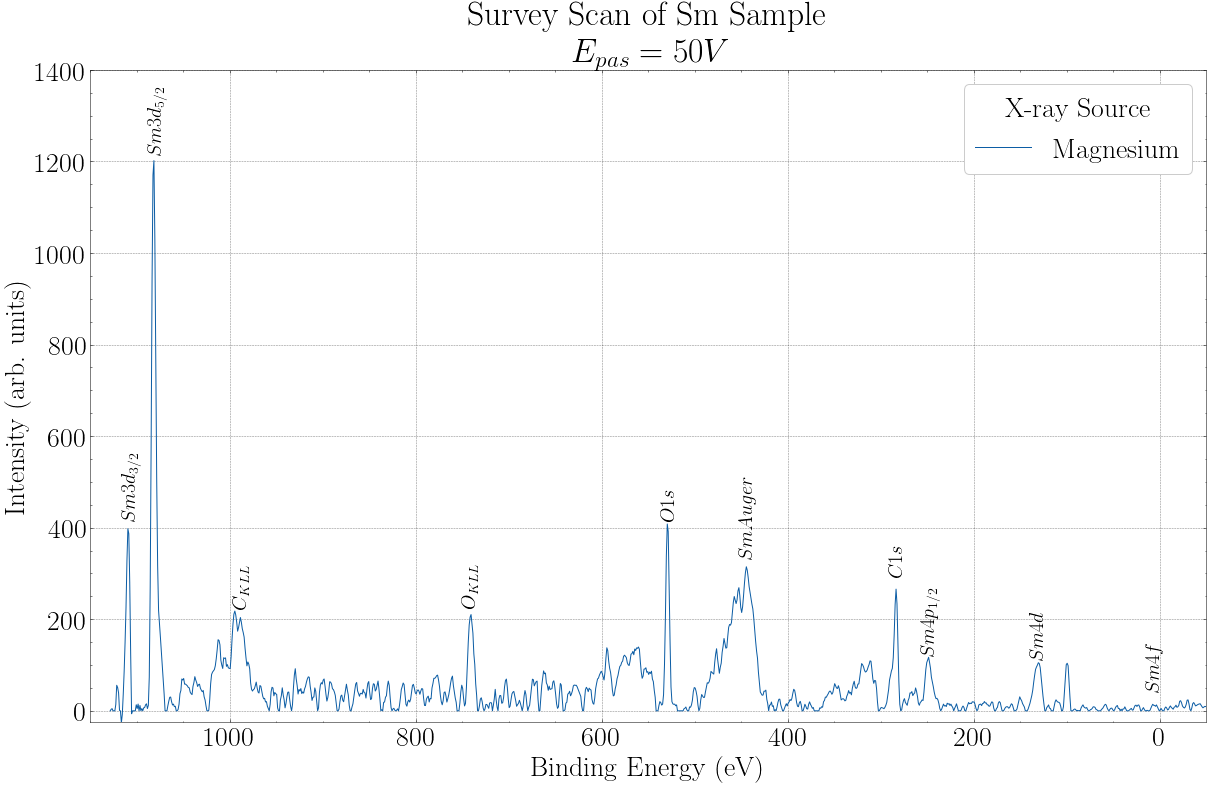

time: 3.06 s (started: 2022-08-13 19:39:35 +00:00)


In [ ]:
#sns.lineplot(data=silver_mg_survey_pp,x="Energy(calc)",y="Scan1",label="Magnesium")
x=sm_mg_survey_pp["Energy(calc)"]
y=sm_mg_survey_pp["Scan1"]
xc=Mg-x+4.8
sns.lineplot(x=xc,y=y,label="Magnesium")
ts=13
plt.annotate(r'$C_{KLL}$', xy=(984.5+ts, 230),  xycoords='data',
            rotation=90,size=20)
plt.annotate(r'$O_{KLL}$', xy=(737.48+ts, 230),  xycoords='data',
            rotation=90,size=20)
plt.annotate(r'$Sm  Auger$', xy=(440.31+ts, 340),  xycoords='data',
            rotation=90,size=20)


plt.annotate(r'$Sm 4p_{1/2}$', xy=(245+ts, 135),  xycoords='data',
            rotation=90,size=20)
plt.annotate(r'$Sm 4d$', xy=(127+ts, 120),  xycoords='data',
            rotation=90,size=20)

plt.annotate(r'$O 1s$', xy=(524+ts, 420),  xycoords='data',
            rotation=90,size=20)

plt.annotate(r'$Sm 3d_{3/2}$', xy=(1105+ts, 430),  xycoords='data',
            rotation=90,size=20)
plt.annotate(r'$Sm 3d_{5/2}$', xy=(1077+ts, 1230),  xycoords='data',
            rotation=90,size=20)

plt.annotate(r'$Sm 4f$', xy=(2.10+ts, 50),  xycoords='data',
            rotation=90,size=20)

plt.annotate(r'$C 1s$', xy=(279.36+ts, 300),  xycoords='data',
            rotation=90,size=20)

plt.xlim(1150, -50)
plt.ylim(-25, 1400)



plt.xlabel("Binding Energy (eV)")
plt.ylabel("Intensity (arb. units)")
plt.legend(title="X-ray Source")
plt.title("Survey Scan of Sm Sample\n"+r"$E_{pas}=50V$")

plt.show()

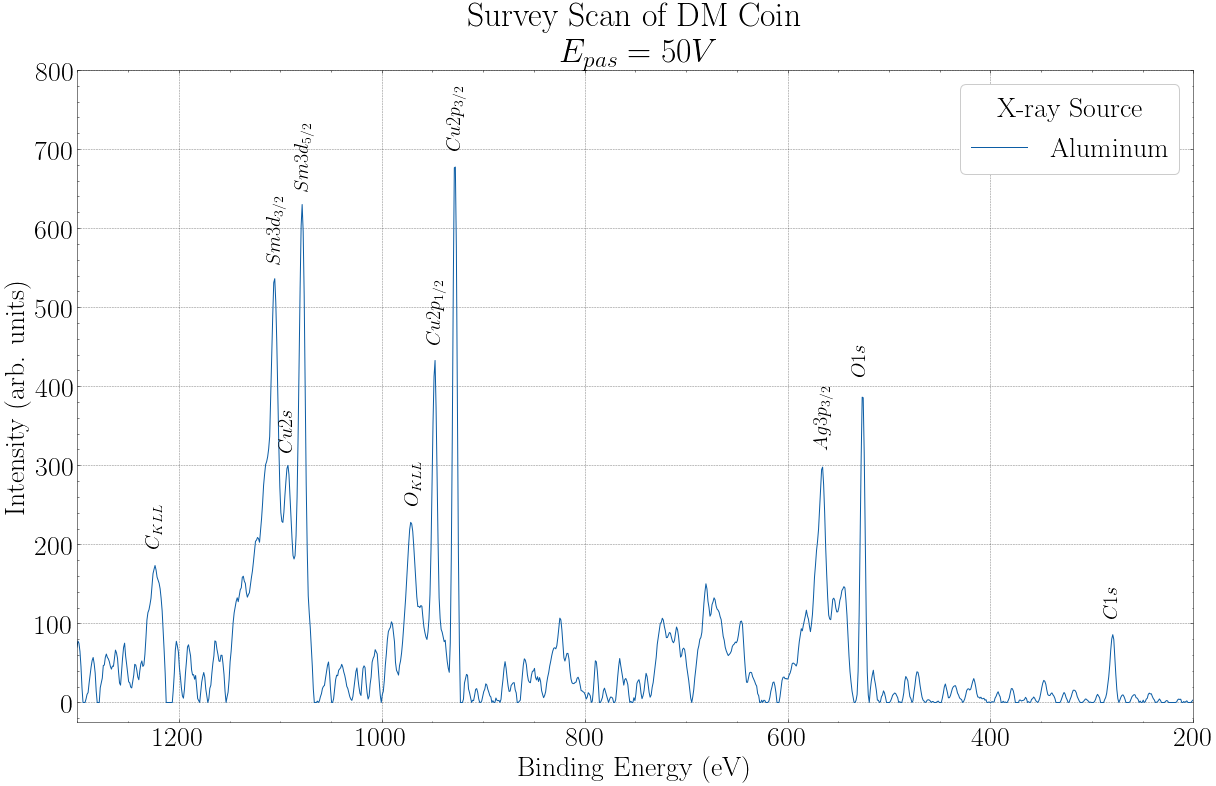

time: 2.3 s (started: 2022-08-13 19:39:38 +00:00)


In [ ]:
x=dm_al_survey_pp["Energy(calc)"]
y=dm_al_survey_pp["Scan1"]
xc=Al-x+4.8
sns.lineplot(x=xc,y=y,label="Aluminum")
xs=13
ys=30

plt.annotate(r'$C_{KLL}$', xy=(1220+xs, 170+ys),  xycoords='data',
            rotation=90,size=20)

plt.annotate(r'$Sm 3d_{3/2}$', xy=(1102+xs, 533+ys),  xycoords='data',
            rotation=90,size=20)
plt.annotate(r'$Sm 3d_{5/2}$', xy=(1074+xs, 626+ys),  xycoords='data',
            rotation=90,size=20)

plt.annotate(r'$Cu2s$', xy=(1089+xs, 292+ys),  xycoords='data',
            rotation=90,size=20)

plt.annotate(r'$O_{KLL}$', xy=(965+xs, 223+ys),  xycoords='data',
            rotation=90,size=20)


plt.annotate(r'$Cu 2p_{1/2}$', xy=(944+xs, 432+ys),  xycoords='data',
            rotation=90,size=20)
plt.annotate(r'$Cu 2p_{3/2}$', xy=(924+xs, 677+ys),  xycoords='data',
            rotation=90,size=20)


plt.annotate(r'$Ag 3p_{3/2}$', xy=(563+xs, 298+ys),  xycoords='data',
            rotation=90,size=20)

plt.annotate(r'$O 1s$', xy=(524+xs, 387+ys),  xycoords='data',
            rotation=90,size=20)

plt.annotate(r'$C 1s$', xy=(276+xs, 82+ys),  xycoords='data',
            rotation=90,size=20)


plt.xlim(1300, 200)
plt.ylim(-25, 800)


plt.xlabel("Binding Energy (eV)")
plt.ylabel("Intensity (arb. units)")
plt.legend(title="X-ray Source")
plt.title("Survey Scan of DM Coin\n"+r"$E_{pas}=50V$")

plt.show()

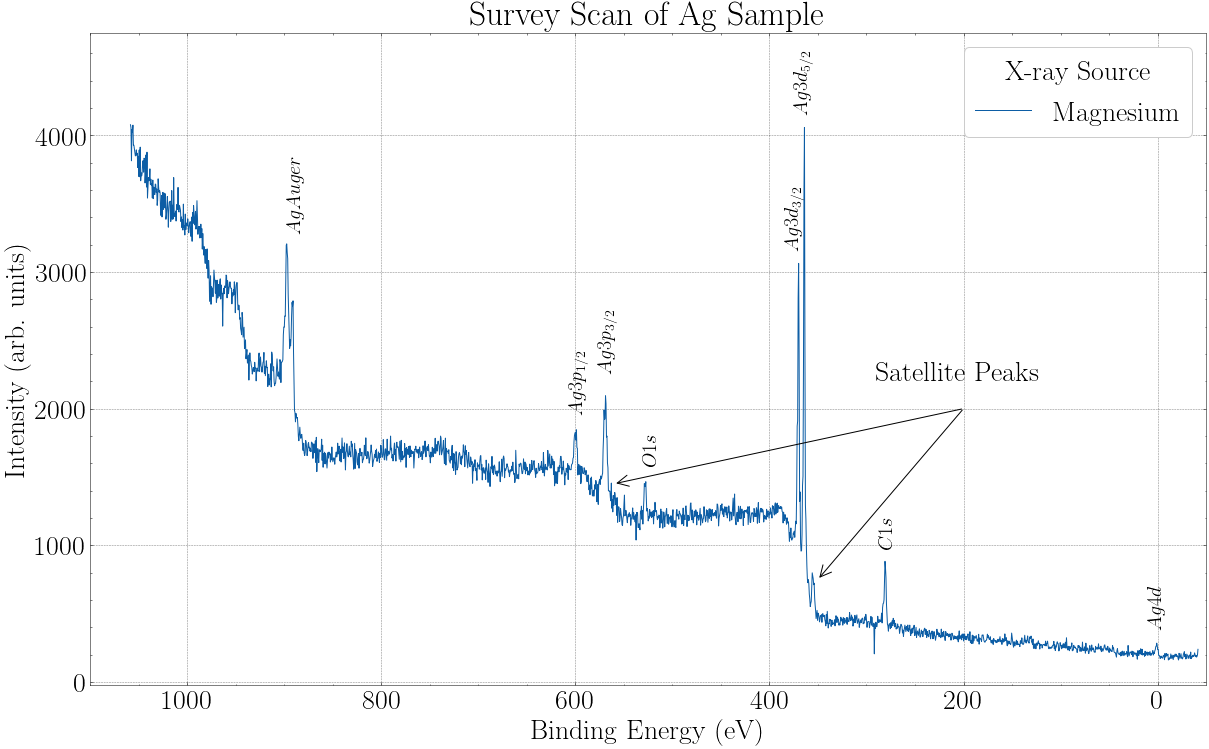

time: 2.49 s (started: 2022-08-13 19:39:40 +00:00)


In [ ]:
#sns.lineplot(data=silver_mg_survey_pp,x="Energy(calc)",y="Scan1",label="Magnesium")
x=Ag_Mg_50eV_full["Energy(calc)"]
y=Ag_Mg_50eV_full["Scan1"]
xc=Mg-x+4.8
sns.lineplot(x=xc,y=y,label="Magnesium")

plt.annotate(r'$Ag Auger$', xy=(4.8+Mg-360.45, 3300),  xycoords='data',
            rotation=90,size=20)


plt.annotate(r'$Ag 3p_{1/2}$', xy=(4.8+Mg-650, 2000),  xycoords='data',
            rotation=90,size=20)
plt.annotate(r'$Ag 3p_{3/2}$', xy=(4.8+Mg-680, 2300),  xycoords='data',
            rotation=90,size=20)

plt.annotate(r'$O 1s$', xy=(4.8+Mg-727, 1600),  xycoords='data',
            rotation=90,size=20)

plt.annotate(r'$Ag 3d_{3/2}$', xy=(4.8+Mg-872, 3200),  xycoords='data',
            rotation=90,size=20)
plt.annotate(r'$Ag 3d_{5/2}$', xy=(4.8+Mg-882, 4200),  xycoords='data',
            rotation=90,size=20)

plt.annotate(r'$Ag 4d$', xy=(4.8+Mg-1247.5, 400),  xycoords='data',
            rotation=90,size=20)

plt.annotate(r'$C 1s$', xy=(4.8+Mg-970.5, 1000),  xycoords='data',
            rotation=90,size=20)

plt.annotate("",
            xy=(350, 750), xycoords='data',
            xytext=(200, 2000), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.annotate("",
            xy=(560, 1450), xycoords='data',
            xytext=(200, 2000), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.annotate(r'Satellite Peaks', xy=(290, 2200),  xycoords='data'
            )

plt.xlim(1100, -50)
plt.ylim(-25, 4750)



plt.xlabel("Binding Energy (eV)")
plt.ylabel("Intensity (arb. units)")
plt.legend(title="X-ray Source")
plt.title("Survey Scan of Ag Sample")

plt.show()

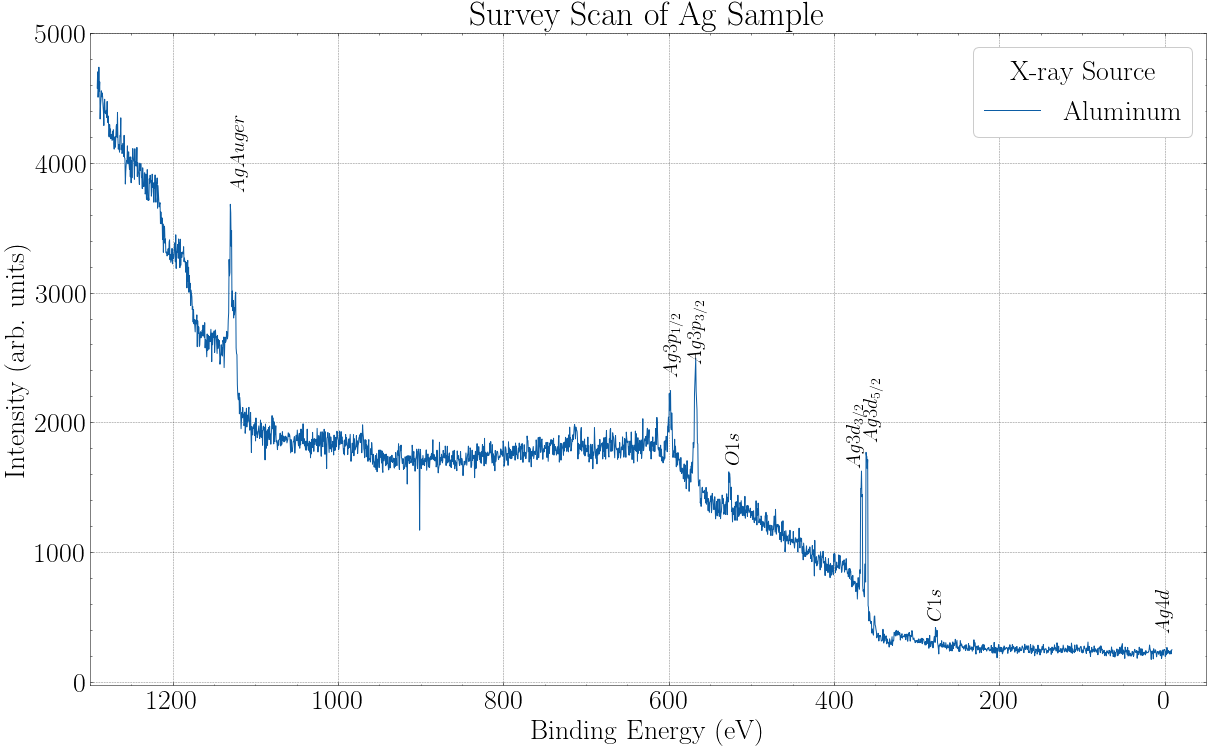

time: 2.11 s (started: 2022-08-13 19:39:43 +00:00)


In [ ]:
#sns.lineplot(data=silver_mg_survey_pp,x="Energy(calc)",y="Scan1",label="Aluminum")
x=Ag_Al_50eV_full["Energy(calc)"]
y=Ag_Al_50eV_full["Scan1"]
xc=Al-x+4.8
sns.lineplot(x=xc,y=y,label="Aluminum")

plt.annotate(r'$Ag Auger$', xy=(4.8+Al-360.45, 3800),  xycoords='data',
            rotation=90,size=20)


plt.annotate(r'$Ag 3p_{1/2}$', xy=(4.8+Mg-650, 2400),  xycoords='data',
            rotation=90,size=20)
plt.annotate(r'$Ag 3p_{3/2}$', xy=(4.8+Mg-680, 2500),  xycoords='data',
            rotation=90,size=20)

plt.annotate(r'$O 1s$', xy=(4.8+Mg-727, 1700),  xycoords='data',
            rotation=90,size=20)

plt.annotate(r'$Ag 3d_{3/2}$', xy=(4.8+Mg-872, 1700),  xycoords='data',
            rotation=90,size=20)
plt.annotate(r'$Ag 3d_{5/2}$', xy=(4.8+Mg-892, 1900),  xycoords='data',
            rotation=90,size=20)

plt.annotate(r'$Ag 4d$', xy=(4.8+Mg-1247.5, 400),  xycoords='data',
            rotation=90,size=20)

plt.annotate(r'$C 1s$', xy=(4.8+Mg-970.5, 500),  xycoords='data',
            rotation=90,size=20)


plt.xlim(1300, -50)
plt.ylim(-25, 5000)



plt.xlabel("Binding Energy (eV)")
plt.ylabel("Intensity (arb. units)")
plt.legend(title="X-ray Source")
plt.title("Survey Scan of Ag Sample")

plt.show()


In [ ]:
Sm_Mg_30eV_FE

,Energy(calc),Energy(meas),Sum,Scan1,Scan2,Scan3,Scan4,Scan5,Scan6,Scan7,...,Scan16,Scan17,Scan18,Scan19,Scan20,Scan21,Scan22,Scan23,Scan24,Scan25
0,1270.0,1258.54,3127,115,123,139,114,123,131,160,...,127,118,135,125,128,120,116,127,118,93
1,1269.8,1258.40,2999,131,117,138,127,139,114,119,...,140,122,119,123,101,141,117,112,118,144
2,1269.6,1258.19,3037,123,121,122,137,121,113,125,...,126,137,105,109,122,130,102,117,133,115
3,1269.4,1258.08,3133,120,129,119,119,117,121,125,...,130,123,115,105,125,137,127,110,123,123
4,1269.2,1257.78,3067,111,150,104,119,111,126,129,...,131,107,100,107,144,128,127,115,117,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,1210.8,1208.01,3201,106,129,136,136,134,125,143,...,126,134,107,125,141,133,123,134,121,131
297,1210.6,1207.82,3285,145,130,131,154,136,161,143,...,140,130,116,120,125,143,146,119,136,120
298,1210.4,1207.63,3184,142,135,124,123,134,132,134,...,132,111,152,120,104,124,119,128,120,128
299,1210.2,1207.37,3087,124,142,121,131,129,135,132,...,120,135,110,109,124,124,112,122,119,117


time: 73.4 ms (started: 2022-08-13 19:39:45 +00:00)


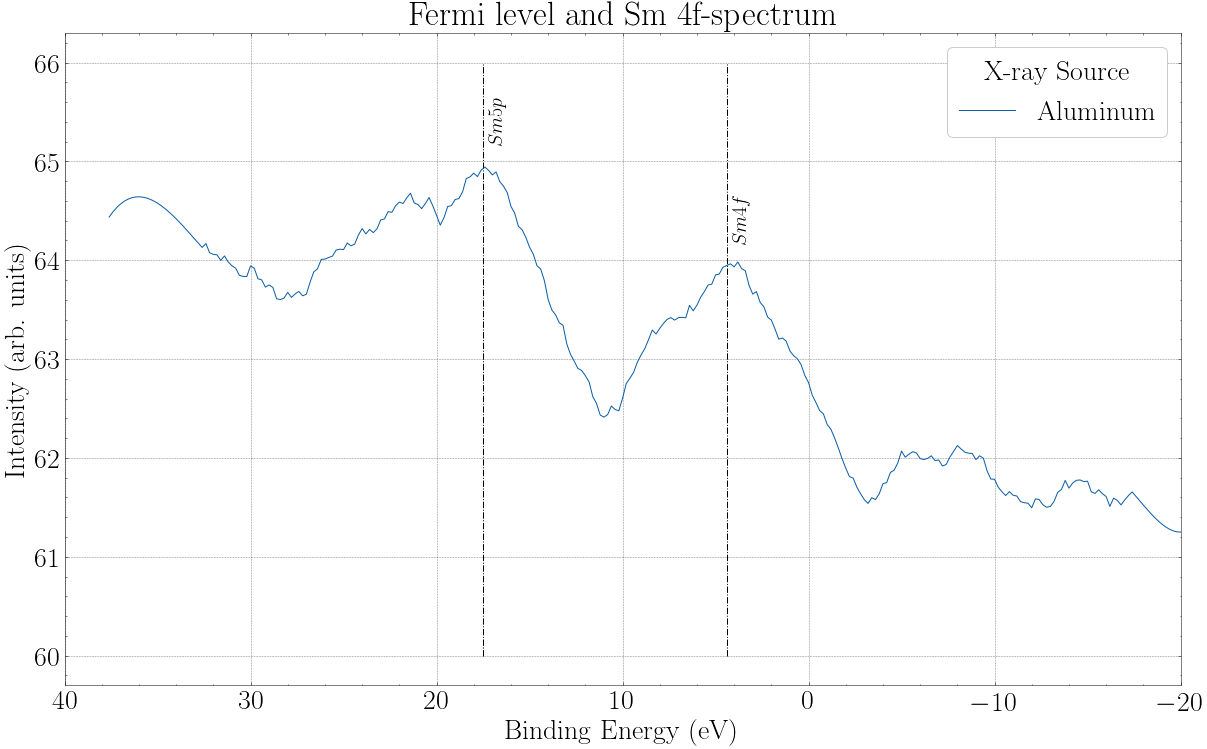

time: 5.11 s (started: 2022-08-13 19:39:45 +00:00)


In [ ]:
x=Sm_Mg_30eV_FE["Energy(calc)"]
y=Sm_Mg_30eV_FE["Sum"]/50
yf=savgol_filter(y, 51, 3)
x=Mg-x-6.0
sns.lineplot(x=x,y=yf,label="Aluminum")
#plt.vlines(6.42,60,66,linestyles="-.")
plt.xlim(40, -20)
plt.vlines(4.36,60,66,linestyles="-.")
plt.vlines(17.5,60,66,linestyles="-.")


plt.annotate(r'$Sm 4f$', xy=(4.10, 64.2),  xycoords='data',
            rotation=90,size=20)

plt.annotate(r'$Sm 5p$', xy=(17.2, 65.2),  xycoords='data',
            rotation=90,size=20)



plt.xlabel("Binding Energy (eV)")
plt.ylabel("Intensity (arb. units)")
plt.legend(title="X-ray Source")
plt.title("Fermi level and Sm 4f-spectrum")

plt.show()


In [ ]:
(31.02+30.84)*2/3/2

20.62

time: 12.1 ms (started: 2022-08-13 19:39:50 +00:00)


In [ ]:
0.20*2/3/2

0.06666666666666667

time: 7.01 ms (started: 2022-08-13 19:39:50 +00:00)


In [ ]:
(27.96+27.09)/2*2/5

11.01

time: 15.8 ms (started: 2022-08-13 19:39:50 +00:00)


In [ ]:
27*2/5

10.8

time: 4.22 ms (started: 2022-08-13 19:39:50 +00:00)


In [ ]:
Z=47
l=1
n=3
a=1/137

time: 7.97 ms (started: 2022-08-13 19:39:50 +00:00)


In [ ]:
Z**4*a**2*27.21/(n**3*(l+1)*(l+0.5)*l)

87.33610518131749

time: 11.8 ms (started: 2022-08-13 19:39:50 +00:00)


In [ ]:
0.450*47**(2.33)/8067

0.43902420569469763

time: 16.8 ms (started: 2022-08-13 19:39:50 +00:00)


In [ ]:
3.47/8096*1000

0.42860671936758893

time: 24.7 ms (started: 2022-08-13 19:39:51 +00:00)


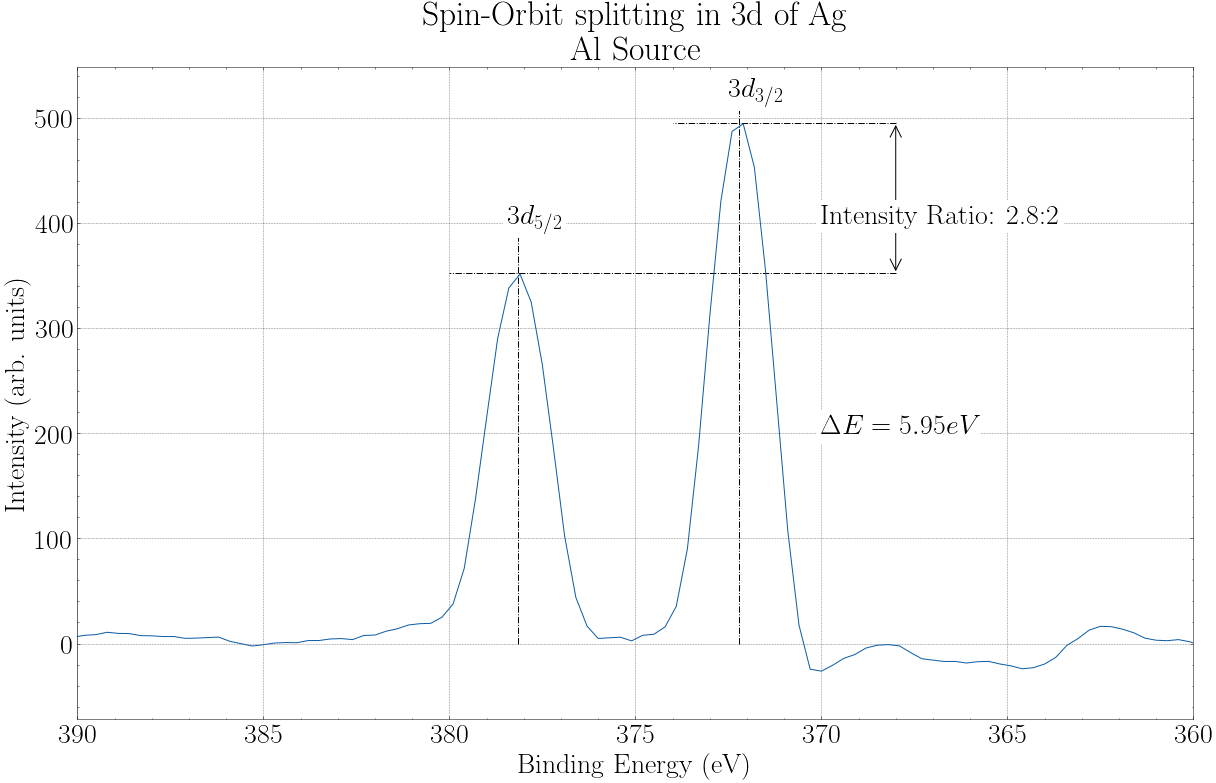

time: 3.27 s (started: 2022-08-13 19:39:51 +00:00)


In [ ]:
x=Ag_Mg_30eV_3d["Energy(calc)"]
y=Ag_Mg_30eV_3d["Sum"]/5
yf=savgol_filter(y, 11, 3)

shift=0

#Background data
D_reg=Ag_Mg_30eV_3d[((Ag_Mg_30eV_3d["Energy(calc)"]>1125) & (Ag_Mg_30eV_3d["Energy(calc)"]<1140))   |
                    ((Ag_Mg_30eV_3d["Energy(calc)"]>1080) & (Ag_Mg_30eV_3d["Energy(calc)"]<1105))]

res = stats.linregress(D_reg["Energy(calc)"],D_reg["Sum"]/5)

#Substract Background
#xr=np.linspace(min(x),max(x),y.shape[0])
#ys=yf-res[0]*xr-res[1]

#Binding Energy
xb=Al-x+4.8
#Plot
sns.lineplot(x=xb,y=yf-res[0]*x-res[1])


#Annotate
plt.vlines(372.2-shift,0,520,linestyles="-.")
plt.vlines(378.15-shift,0,400,linestyles="-.")

plt.hlines(352,368-shift,380-shift,linestyles="-.")
plt.hlines(495,368-shift,374-shift,linestyles="-.")



plt.annotate("",
            xy=(368-shift, 352), xycoords='data',
            xytext=(368-shift, 495), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"),
            )

plt.annotate(r'Intensity Ratio: 2.8:2 ', xy=(370-shift, 400),  xycoords='data',backgroundcolor="w"
            )

plt.annotate(r'$\Delta E = 5.95 eV$', xy=(370-shift, 200),  xycoords='data',backgroundcolor="w"
            )

plt.annotate(r'$3d_{3/2}$', xy=(372.5-shift, 520),  xycoords='data',backgroundcolor="w",
            )

plt.annotate(r'$3d_{5/2}$', xy=(378.45-shift, 400),  xycoords='data',backgroundcolor="w",
            )

#Invert X-axis & set Plot params
plt.xlim(390-shift,360-shift)


plt.xlabel("Binding Energy (eV)")
plt.ylabel("Intensity (arb. units)")

plt.title("Spin-Orbit splitting in 3d of Ag \n Al Source")

plt.show()

In [ ]:
378.15-372.2

5.949999999999989

time: 4.77 ms (started: 2022-08-13 19:39:54 +00:00)


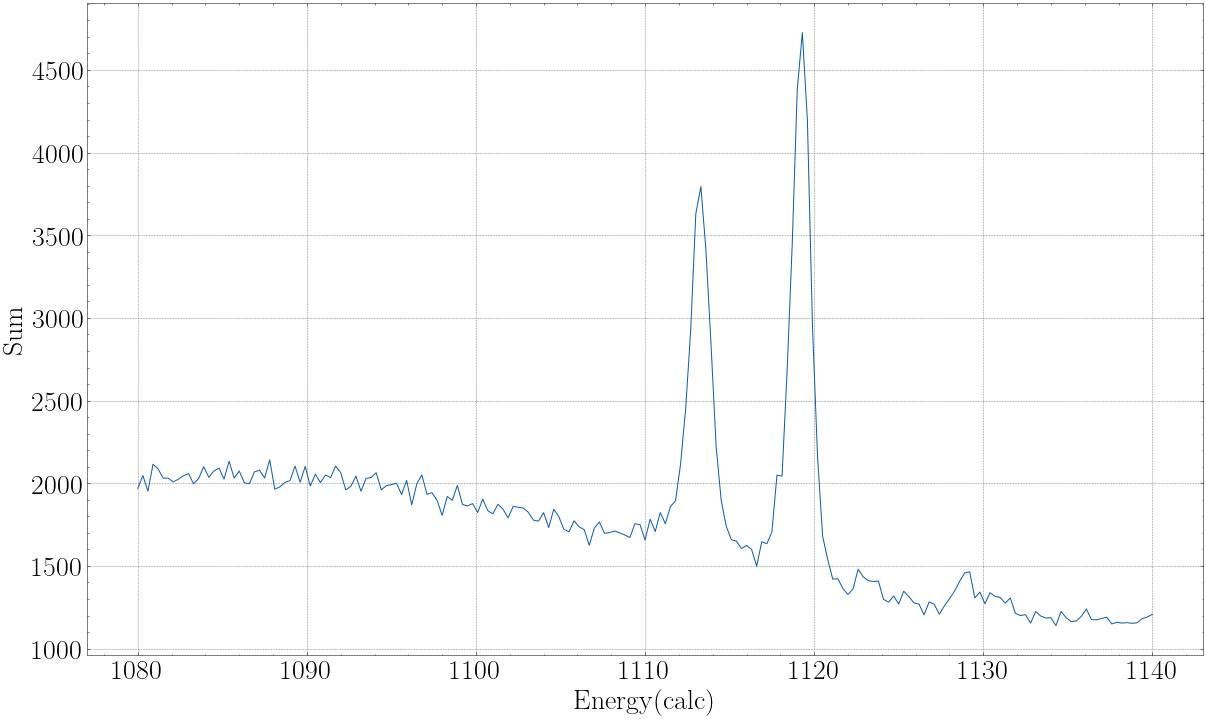

time: 1.17 s (started: 2022-08-13 19:39:54 +00:00)


In [ ]:
sns.lineplot(data=Ag_Mg_30eV_3d,x="Energy(calc)",y="Sum")

In [ ]:
(31.02+30.84)/2

30.93

time: 5 ms (started: 2022-08-13 19:39:55 +00:00)


In [ ]:
30.93*2/3

20.62

time: 4.29 ms (started: 2022-08-13 19:39:55 +00:00)


In [ ]:
495/352*2

2.8125

time: 11.7 ms (started: 2022-08-13 19:39:55 +00:00)


In [ ]:
3/2

1.5

time: 3.75 ms (started: 2022-08-13 19:39:55 +00:00)


In [ ]:
5.95*2/5

2.38

time: 6.57 ms (started: 2022-08-13 19:39:55 +00:00)


In [ ]:
(372-368)/368*100

1.0869565217391304

time: 14.9 ms (started: 2022-08-13 20:18:28 +00:00)


In [ ]:
(21.3-17.5)/21.3*100

17.840375586854464

time: 12.3 ms (started: 2022-08-13 21:11:58 +00:00)


In [ ]:
(5.2-4.4)/5.2*100

15.38461538461538

time: 5.04 ms (started: 2022-08-13 21:12:32 +00:00)


In [ ]:
(1091.1-1082.9)*2/5

3.2799999999999274

time: 5.5 ms (started: 2022-08-13 21:38:22 +00:00)
